In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from functions import load_data
from functions import escala_precipitacion
from functions import escala_vientos
from functions import tabla_promedio_metereologia
from functions import plot_hourly_precipitation_all_stations
from functions import get_texto_viento

file_cfg_path = '../../../../configuracion.json'

# Leer el archivo JSON en un diccionario
with open(file_cfg_path, 'r') as file:
    data_dict = json.load(file)

ESTACIONES=data_dict["ESTACIONES"]
FECHA_INICIO = data_dict["FECHA_INICIO"]
FECHA_FINAL = data_dict["FECHA_FINAL"]
PATH_DATOS = f"../../../../{data_dict["PATH_DATOS"]}"



ESTACIONES = load_data(PATH_DATOS,ESTACIONES,FECHA_INICIO,FECHA_FINAL)


In [4]:
df_precipitacion=escala_precipitacion()
df_precipitacion

,Denominacion,Precipitacion diaria
0,Escasa,0-5
1,Ligera,6-10
2,Moderada,11-20
3,Fuerte,21-50
4,Muy fuerte,51-70
5,Intensa,>70


In [5]:
ESTACIONES[1]['DF_DATOS']["PRECIPITACION"]=ESTACIONES[1]['DF_DATOS']["PRECIPITACION"]*2+0.1

In [6]:
df_viento = escala_vientos(ESTACIONES)
df_viento

,Descripcion,Rango de Velocidad,Porcentaje NAME 1,Porcentaje NAME 2
0,Calma,0 - 0.2,52.1%,52.1%
1,Aire Ligero,0.3 - 1.6,25.6%,25.6%
2,Brisa Ligera,1.6 - 3.4,16.5%,16.5%
3,Brisa Suave,3.4 - 5.5,0.8%,0.8%
4,Brisa Moderada,5.5 - 8,0.0%,0.0%
5,Brisa Fresca,8 - 10.9,0.0%,0.0%
6,Brisa Fuerte,10.9 - 13.9,0.0%,0.0%
7,Viento Casi temporal,13.9 - 16.9,0.0%,0.0%
8,Viento Temporal,17 - 20.5,0.0%,0.0%
9,Viento Temporal Fuerte,20.6 - 24.1,0.0%,0.0%


In [7]:
dfs_estaciones = tabla_promedio_metereologia(ESTACIONES)
dfs_estaciones

,variable,NAME 1,NAME 2
0,Hum. (%),80.909247,80.909247
1,Rain. (mm),1.0,14.1
2,Bar. (mmHg),561.330496,561.330496
3,Temp (°C),13.316676,13.316676
4,W. Speed. (m/s),Calma,Calma
5,Max. W.S (m/s),3.882627,3.882627
6,Wind Dir,ESE,ESE


c:\Users\KevinAlejandroNaranj\OneDrive - XACTUS S.A.S\Info PC\Escritorio\XACTUS\18) GENERACION DE REPORTES\AUTOMATIZACION_REPORTES\src\utils\metereologia\tablas\..\functions.py:171: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_datos.resample('H').sum()
c:\Users\KevinAlejandroNaranj\OneDrive - XACTUS S.A.S\Info PC\Escritorio\XACTUS\18) GENERACION DE REPORTES\AUTOMATIZACION_REPORTES\src\utils\metereologia\tablas\..\functions.py:171: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_datos.resample('H').sum()


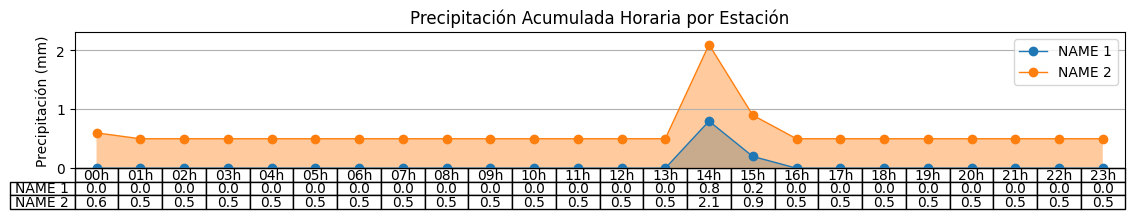

In [8]:
plot_hourly_precipitation_all_stations(ESTACIONES)

In [9]:
TEXTO_VIENTO=get_texto_viento(FECHA_INICIO,FECHA_FINAL,ESTACIONES)
TEXTO_VIENTO

'Durante el periodo analizado 2022-12-10 00:00 - 2022-12-15 00:00 /n para la estación NAME 1, la dirección predominante del viento, corresponde a vectores provenientes del N, principalmente desde el 70.81142529116666 con velocidades registradas de hasta 3.88262669245402 m/s, y en menor cantidad desde el O desde la dirección 143.75185138833334 se registraron datos desde 0.0 mm con un volumen acumulado de 1.0000000298220901 mm \npara la estación NAME 2, la dirección predominante del viento, corresponde a vectores provenientes del N, principalmente desde el 70.81142529116666 con velocidades registradas de hasta 3.88262669245402 m/s, y en menor cantidad desde el O desde la dirección 143.75185138833334 se registraron datos desde 0.1 mm con un volumen acumulado de 14.100000059644183 mm \n'